<a href="https://colab.research.google.com/github/SergeyAnufriev/LSTM/blob/master/Hill_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/LSTM
!git clone https://github.com/SergeyAnufriev/LSTM.git

Cloning into 'LSTM'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 102 (delta 52), reused 72 (delta 22), pack-reused 0
Receiving objects: 100% (102/102), 13.63 MiB | 18.86 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
%%bash
wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
chmod +x Miniconda3-latest-Linux-x86_64.sh
./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
conda config --set always_yes yes --set changeps1 no
conda install -q -y -c conda-forge python=3.7
conda install -q -y -c conda-forge rdkit==2020.09.2 

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py39h06a4308_0
    - cffi==1.14.6=py39h400218f_0
    - chardet==4.0.0=py39h06a4308_1003
    - conda-package-handling==1.7.3=py39h27cfd23_1
    - conda==4.10.3=py39h06a4308_0
    - cryptography==3.4.7=py39hd23ed53_0
    - idna==2.10=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1k=h27cfd23_0
    - pip==21.1.3=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.20=py_2
    - pyopenssl==20.0.1=pyhd3eb1b0_1
    - pysocks==1.7.1=py39h06a4308_0
    - python==3

--2021-08-04 09:32:34--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2021-08-04 09:32:34--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66709754 (64M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 3.08M 21s
    50K .......... .......... .......... .......... .........

In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 18.6 MB 154 kB/s 


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
vals = [-0.5388, -100000, -0.9651000000000003, -0.047499999999999765, 1.7399, 1.14312, 1.039, 0.07629999999999992, 0.4509999999999999, 1.1578, 1.4331, 0.7969999999999999, -0.14359999999999995, 1.5574, 1.5770999999999997, 0.6380999999999999, -0.5158000000000001, -0.38250000000000006, 0.5092999999999999, 0.8288999999999997, 0.5063200000000001, 0.4845999999999999, 1.63154, 1.048, 0.21539999999999998, 0.54328, 0.3463, -0.19940000000000002, 0.8101999999999999, 1.1837, 1.3246999999999998, 0.4037, 0.049879999999999924, 0.3857, 1.5737999999999999, 2.752700000000001, 1.9082999999999999, 1.6215, -100000, -0.24090000000000011, 1.11788, 1.9317, 1.0406, 1.08032, 0.17507999999999996, -0.5590200000000001, 0.5182999999999998, -100000, 0.2646, 1.7243000000000002, -0.4236200000000002, 0.4037, -0.7410000000000001, -0.34022, -0.7039000000000002, 1.805, 0.6318999999999999, -0.1529000000000002, 1.2003000000000001, 1.8856, 0.79588, -1.5195000000000003, 0.03617999999999971, -0.12952000000000002, -0.7879800000000001, -1.539899999999999, 0.1381, 0.5298, 0.38730000000000003, 0.13719999999999954, 1.5574, 1.0231999999999999, -0.5361, -2.305, -0.28410000000000024, -0.7263000000000002, -0.4650000000000001, -0.7018000000000002, 0.9078999999999999, 0.5446, 0.8085, -0.6676000000000002, -0.2036, 1.0512799999999998, 0.11788000000000004, 0.10339999999999977, -0.7448000000000001, 1.72182, -0.31729999999999997, 1.3312, -0.33150000000000013, 0.9543, 2.5866000000000007, -0.3789, -0.6649, -0.9652000000000001, 1.7226000000000001, -1.999399999999999, 1.32508, 0.1481999999999999, 0.4775000000000001, 0.5079799999999999, 0.9527, -1.5898000000000003, 0.6271, -1.2808000000000002, -0.37684000000000006, 0.9333799999999999, -1.26, 0.5817700000000001, 1.1468, 0.38879999999999987, 1.0746, 1.16298, 0.5282, 1.4133, 0.6728999999999999, 1.1909, -0.5707, 1.6377, 1.1871, 1.4347, 2.4591000000000003, 0.27577, 0.6103, 1.0594000000000001, 0.6087, 0.1336799999999999, 0.8005, 0.33459999999999984, -0.13319999999999999, 1.4084999999999999, -0.023300000000000043, -0.4809999999999998, -0.78884, -0.26260000000000017, 0.15790000000000015, 1.7656, -0.16960000000000008, 1.0221999999999998, -0.53314, 0.4235, 0.44579999999999953, 1.2314, 2.1921800000000005, 1.3934, 0.44999999999999996, 0.7303, 1.5049000000000001, 1.2499, 0.4379, -0.39109999999999995, 0.11628, -0.2638000000000001, 0.24040000000000006, -0.27612000000000003, 0.07979999999999993, -0.0484, 0.7279, 0.4526000000000001, -0.7246999999999999, 0.20380000000000004, 1.46918, -0.06970000000000004, -0.8777000000000004, 1.3057999999999998, -100000, 2.09028, 0.83708, -0.4494000000000002, -0.7263000000000002, -0.9780000000000004, 0.56, 0.42371999999999993, -100000, -0.32930000000000015, 0.016319999999999835, -0.16779999999999995, -0.5860000000000001, -0.7274200000000002, 0.2022, 1.4353799999999999, -0.8731, 0.5462, 0.9579, -0.005800000000000027, -0.7769200000000003, 0.037699999999999956, -0.5064000000000002, 1.6773, -100000, 0.10589999999999983, 1.4347, 0.32739999999999997, 0.12229999999999996, 1.94618, -0.19420000000000015, 0.9975799999999999, -0.9385999999999999, -1.2018000000000002, 0.9209999999999998, -0.7422200000000001, -0.31123000000000006, 1.7179, 1.805, 0.27760000000000007, 1.2681, 1.1921, 1.0739, -2.1194999999999995, 1.41198, 0.03457999999999989, 1.0232999999999999, 0.6271000000000001, 0.7286999999999999, 0.4103, -0.6479000000000001, 0.09450000000000003, -1.1207000000000003, -0.24480000000000007, 0.3322999999999999, -100000, 1.6, 2.0524, 0.6103, 0.5626, 1.46758, 1.46918, 0.22030000000000005, -0.8173000000000001, -0.14600000000000035, 0.6709799999999999, 1.4133, 1.9655, 1.7179, 1.9874999999999998, -0.6880300000000001, 1.4795800000000001, 0.5626, 0.43449999999999994, 2.2115, 1.5476, 0.11599999999999999, -0.49669999999999986, -0.2532000000000001, 0.5462, 0.93658, 0.2052, 1.769, 0.8118, 0.08909999999999996, 0.4050199999999999, -1.4449, -1.2603000000000002, 0.5642, -100000, -0.90632, -0.3541999999999998, 1.1839, -0.6059000000000001, -0.5016, 0.9937999999999998, -0.26750000000000024, -0.3598999999999999, -0.09352000000000005, 0.6381, 0.9225999999999999, 0.20380000000000004, 0.8391, 0.7787999999999999, 0.9579, 0.5067999999999999, 1.5345, 2.0258000000000003, 0.80348, 0.9597, -0.6485000000000001, 1.0097, -100000, 1.8921000000000001, 3.142800000000002, 0.45949999999999996, -0.043800000000000006, 0.13970000000000005, 1.2039, 1.3496, -0.5222499999999999, 1.6249, 0.5178000000000001, -0.78192, 1.7235, 0.08200000000000007, 0.32810000000000017, 0.09079999999999999, 1.9891, 1.9475000000000002, 1.1706999999999999, -100000, 2.01038, 0.3463, 0.7527999999999999, 0.98588, 0.7285999999999999, 2.2115, 0.38898000000000005, 0.8758199999999998, 0.6564, -0.8646, -100000, 0.6728999999999999, -0.06970000000000015, 0.18100000000000005, 3.2227000000000023, 1.5672000000000001, 0.12389999999999995, 1.4313, -1.1718000000000004, -0.2107000000000001, 1.559, 1.3944, -0.2158, 1.4338999999999997, 0.3322999999999999, 0.6136999999999999, 1.9475000000000002, 0.984, 0.36609999999999987, -0.7443000000000002, 1.0024, 2.617300000000001, 0.23710000000000003, 1.4133, 0.3509999999999999, -0.9345000000000003, 0.1418999999999998, -0.8895000000000002, 1.4313, -0.17320000000000002, 2.5067000000000004, 1.3334000000000001, -0.6854, -1.1758000000000002, 0.6451, 1.2003000000000001, -1.0061200000000001, -1.7250999999999987, 1.9355200000000001, 0.12079999999999991, 0.10238000000000003, 1.86628, -1.0370000000000004, -0.1762999999999999, 1.2872, 1.5574, 1.5955199999999998, 0.8004, -0.8224, -1.9634999999999998, 0.19801999999999997, 2.5287000000000006, -0.053300000000000125, 0.007379999999999998, 0.8841, -100000, 1.4242, 0.5994, -0.07320000000000038, 3.286900000000002, 0.36429999999999996, -0.04039999999999999, 1.7250999999999999, 1.7399, -100000, 1.0385, 1.34568, 1.7399, -1.00472, -0.12090000000000017, 0.30762, 2.6885000000000012, 1.3843, -0.11311999999999983, 2.0558, -0.1665000000000001, -0.86494, 0.5478000000000001, -100000, -1.3177000000000003, -0.8654000000000002, -0.47290000000000004, -0.6795800000000003, 0.8093999999999999, -0.3173000000000001, 0.0819200000000001, 0.7835999999999999, 0.48752, -0.6050000000000001, 1.4962199999999999, 0.7785, -0.9779199999999999, -2.1647, 1.5788, 1.2314, 1.1673, -0.35391999999999996, 0.16739999999999977, -0.6649, 0.2617000000000001, -0.13490000000000002, 1.462, 1.279, -0.8648, 0.81508, -0.5840000000000001, 1.5345, 0.18899999999999995, -0.45819999999999994, 1.39862, -100000, -1.1441000000000001, 0.18609999999999993, 0.9975799999999999, 0.7303, 1.599, -100000, -0.5606200000000001, 3.0629000000000017, 1.2049, -1.3269000000000002, 1.94618, 0.8487199999999999, 1.2968, 0.24039999999999995, 1.6789, 0.784, 0.14130000000000004, 0.8005, -0.36072000000000015, -0.0028000000000000247, 0.6513, 0.9543, 0.1644, -0.4666000000000003, -0.6180300000000003, 0.7938000000000001, -1.3605000000000003, 2.4645, 1.9655, -0.0821000000000004, 1.0446, 0.291, 0.56148, 0.2022, 0.3893, 0.8118, -100000, 1.8479999999999999, 1.6823, -100000, 2.2861000000000002, -0.8879000000000001, 1.6857, 2.608600000000001, -0.15872000000000008, 1.3327, 0.91702, -0.26589999999999997, 1.0265399999999998, 0.7323, 1.3145, 2.608600000000001, 0.07281999999999983, -0.25160000000000005, -1.9159999999999995, -0.6416999999999999, 0.8791800000000001, -0.8812000000000002, 0.5284800000000001, -0.2667000000000001, 0.2085999999999999, 0.26710000000000006, 0.6618999999999997, 1.1113199999999999, 2.5900000000000007, 1.4939, -0.35661999999999994, 1.3755, -0.5657300000000003, -100000, 1.6609, -100000, 0.13629999999999998, 1.55948, -0.9109, 0.6364999999999998, -0.5230800000000002, 0.3042, 0.28428000000000003, 0.48669999999999997, -0.11438000000000015]

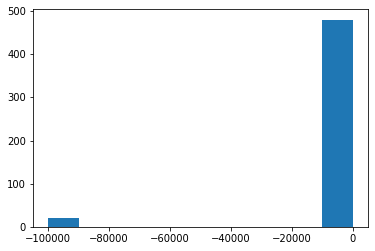

In [ ]:
plt.hist([-0.5388, -100000, -0.9651000000000003, -0.047499999999999765, 1.7399, 1.14312, 1.039, 0.07629999999999992, 0.4509999999999999, 1.1578, 1.4331, 0.7969999999999999, -0.14359999999999995, 1.5574, 1.5770999999999997, 0.6380999999999999, -0.5158000000000001, -0.38250000000000006, 0.5092999999999999, 0.8288999999999997, 0.5063200000000001, 0.4845999999999999, 1.63154, 1.048, 0.21539999999999998, 0.54328, 0.3463, -0.19940000000000002, 0.8101999999999999, 1.1837, 1.3246999999999998, 0.4037, 0.049879999999999924, 0.3857, 1.5737999999999999, 2.752700000000001, 1.9082999999999999, 1.6215, -100000, -0.24090000000000011, 1.11788, 1.9317, 1.0406, 1.08032, 0.17507999999999996, -0.5590200000000001, 0.5182999999999998, -100000, 0.2646, 1.7243000000000002, -0.4236200000000002, 0.4037, -0.7410000000000001, -0.34022, -0.7039000000000002, 1.805, 0.6318999999999999, -0.1529000000000002, 1.2003000000000001, 1.8856, 0.79588, -1.5195000000000003, 0.03617999999999971, -0.12952000000000002, -0.7879800000000001, -1.539899999999999, 0.1381, 0.5298, 0.38730000000000003, 0.13719999999999954, 1.5574, 1.0231999999999999, -0.5361, -2.305, -0.28410000000000024, -0.7263000000000002, -0.4650000000000001, -0.7018000000000002, 0.9078999999999999, 0.5446, 0.8085, -0.6676000000000002, -0.2036, 1.0512799999999998, 0.11788000000000004, 0.10339999999999977, -0.7448000000000001, 1.72182, -0.31729999999999997, 1.3312, -0.33150000000000013, 0.9543, 2.5866000000000007, -0.3789, -0.6649, -0.9652000000000001, 1.7226000000000001, -1.999399999999999, 1.32508, 0.1481999999999999, 0.4775000000000001, 0.5079799999999999, 0.9527, -1.5898000000000003, 0.6271, -1.2808000000000002, -0.37684000000000006, 0.9333799999999999, -1.26, 0.5817700000000001, 1.1468, 0.38879999999999987, 1.0746, 1.16298, 0.5282, 1.4133, 0.6728999999999999, 1.1909, -0.5707, 1.6377, 1.1871, 1.4347, 2.4591000000000003, 0.27577, 0.6103, 1.0594000000000001, 0.6087, 0.1336799999999999, 0.8005, 0.33459999999999984, -0.13319999999999999, 1.4084999999999999, -0.023300000000000043, -0.4809999999999998, -0.78884, -0.26260000000000017, 0.15790000000000015, 1.7656, -0.16960000000000008, 1.0221999999999998, -0.53314, 0.4235, 0.44579999999999953, 1.2314, 2.1921800000000005, 1.3934, 0.44999999999999996, 0.7303, 1.5049000000000001, 1.2499, 0.4379, -0.39109999999999995, 0.11628, -0.2638000000000001, 0.24040000000000006, -0.27612000000000003, 0.07979999999999993, -0.0484, 0.7279, 0.4526000000000001, -0.7246999999999999, 0.20380000000000004, 1.46918, -0.06970000000000004, -0.8777000000000004, 1.3057999999999998, -100000, 2.09028, 0.83708, -0.4494000000000002, -0.7263000000000002, -0.9780000000000004, 0.56, 0.42371999999999993, -100000, -0.32930000000000015, 0.016319999999999835, -0.16779999999999995, -0.5860000000000001, -0.7274200000000002, 0.2022, 1.4353799999999999, -0.8731, 0.5462, 0.9579, -0.005800000000000027, -0.7769200000000003, 0.037699999999999956, -0.5064000000000002, 1.6773, -100000, 0.10589999999999983, 1.4347, 0.32739999999999997, 0.12229999999999996, 1.94618, -0.19420000000000015, 0.9975799999999999, -0.9385999999999999, -1.2018000000000002, 0.9209999999999998, -0.7422200000000001, -0.31123000000000006, 1.7179, 1.805, 0.27760000000000007, 1.2681, 1.1921, 1.0739, -2.1194999999999995, 1.41198, 0.03457999999999989, 1.0232999999999999, 0.6271000000000001, 0.7286999999999999, 0.4103, -0.6479000000000001, 0.09450000000000003, -1.1207000000000003, -0.24480000000000007, 0.3322999999999999, -100000, 1.6, 2.0524, 0.6103, 0.5626, 1.46758, 1.46918, 0.22030000000000005, -0.8173000000000001, -0.14600000000000035, 0.6709799999999999, 1.4133, 1.9655, 1.7179, 1.9874999999999998, -0.6880300000000001, 1.4795800000000001, 0.5626, 0.43449999999999994, 2.2115, 1.5476, 0.11599999999999999, -0.49669999999999986, -0.2532000000000001, 0.5462, 0.93658, 0.2052, 1.769, 0.8118, 0.08909999999999996, 0.4050199999999999, -1.4449, -1.2603000000000002, 0.5642, -100000, -0.90632, -0.3541999999999998, 1.1839, -0.6059000000000001, -0.5016, 0.9937999999999998, -0.26750000000000024, -0.3598999999999999, -0.09352000000000005, 0.6381, 0.9225999999999999, 0.20380000000000004, 0.8391, 0.7787999999999999, 0.9579, 0.5067999999999999, 1.5345, 2.0258000000000003, 0.80348, 0.9597, -0.6485000000000001, 1.0097, -100000, 1.8921000000000001, 3.142800000000002, 0.45949999999999996, -0.043800000000000006, 0.13970000000000005, 1.2039, 1.3496, -0.5222499999999999, 1.6249, 0.5178000000000001, -0.78192, 1.7235, 0.08200000000000007, 0.32810000000000017, 0.09079999999999999, 1.9891, 1.9475000000000002, 1.1706999999999999, -100000, 2.01038, 0.3463, 0.7527999999999999, 0.98588, 0.7285999999999999, 2.2115, 0.38898000000000005, 0.8758199999999998, 0.6564, -0.8646, -100000, 0.6728999999999999, -0.06970000000000015, 0.18100000000000005, 3.2227000000000023, 1.5672000000000001, 0.12389999999999995, 1.4313, -1.1718000000000004, -0.2107000000000001, 1.559, 1.3944, -0.2158, 1.4338999999999997, 0.3322999999999999, 0.6136999999999999, 1.9475000000000002, 0.984, 0.36609999999999987, -0.7443000000000002, 1.0024, 2.617300000000001, 0.23710000000000003, 1.4133, 0.3509999999999999, -0.9345000000000003, 0.1418999999999998, -0.8895000000000002, 1.4313, -0.17320000000000002, 2.5067000000000004, 1.3334000000000001, -0.6854, -1.1758000000000002, 0.6451, 1.2003000000000001, -1.0061200000000001, -1.7250999999999987, 1.9355200000000001, 0.12079999999999991, 0.10238000000000003, 1.86628, -1.0370000000000004, -0.1762999999999999, 1.2872, 1.5574, 1.5955199999999998, 0.8004, -0.8224, -1.9634999999999998, 0.19801999999999997, 2.5287000000000006, -0.053300000000000125, 0.007379999999999998, 0.8841, -100000, 1.4242, 0.5994, -0.07320000000000038, 3.286900000000002, 0.36429999999999996, -0.04039999999999999, 1.7250999999999999, 1.7399, -100000, 1.0385, 1.34568, 1.7399, -1.00472, -0.12090000000000017, 0.30762, 2.6885000000000012, 1.3843, -0.11311999999999983, 2.0558, -0.1665000000000001, -0.86494, 0.5478000000000001, -100000, -1.3177000000000003, -0.8654000000000002, -0.47290000000000004, -0.6795800000000003, 0.8093999999999999, -0.3173000000000001, 0.0819200000000001, 0.7835999999999999, 0.48752, -0.6050000000000001, 1.4962199999999999, 0.7785, -0.9779199999999999, -2.1647, 1.5788, 1.2314, 1.1673, -0.35391999999999996, 0.16739999999999977, -0.6649, 0.2617000000000001, -0.13490000000000002, 1.462, 1.279, -0.8648, 0.81508, -0.5840000000000001, 1.5345, 0.18899999999999995, -0.45819999999999994, 1.39862, -100000, -1.1441000000000001, 0.18609999999999993, 0.9975799999999999, 0.7303, 1.599, -100000, -0.5606200000000001, 3.0629000000000017, 1.2049, -1.3269000000000002, 1.94618, 0.8487199999999999, 1.2968, 0.24039999999999995, 1.6789, 0.784, 0.14130000000000004, 0.8005, -0.36072000000000015, -0.0028000000000000247, 0.6513, 0.9543, 0.1644, -0.4666000000000003, -0.6180300000000003, 0.7938000000000001, -1.3605000000000003, 2.4645, 1.9655, -0.0821000000000004, 1.0446, 0.291, 0.56148, 0.2022, 0.3893, 0.8118, -100000, 1.8479999999999999, 1.6823, -100000, 2.2861000000000002, -0.8879000000000001, 1.6857, 2.608600000000001, -0.15872000000000008, 1.3327, 0.91702, -0.26589999999999997, 1.0265399999999998, 0.7323, 1.3145, 2.608600000000001, 0.07281999999999983, -0.25160000000000005, -1.9159999999999995, -0.6416999999999999, 0.8791800000000001, -0.8812000000000002, 0.5284800000000001, -0.2667000000000001, 0.2085999999999999, 0.26710000000000006, 0.6618999999999997, 1.1113199999999999, 2.5900000000000007, 1.4939, -0.35661999999999994, 1.3755, -0.5657300000000003, -100000, 1.6609, -100000, 0.13629999999999998, 1.55948, -0.9109, 0.6364999999999998, -0.5230800000000002, 0.3042, 0.28428000000000003, 0.48669999999999997, -0.11438000000000015]
)
plt.show()

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
sys.path.insert(0,'/content/LSTM')

In [ ]:
from rdkit import Chem

In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import json

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

'''Custom modules'''
from data_ import Dataset_
from utils_ import loss_,sample_,sample_
from chem_ import substructure,top_k_smiles

In [ ]:
'''Set the random seeds for deterministic results'''
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True

In [ ]:
n_epochs   = 10
EMBED_DIM  = 100
batch_size = 64
n_hidden   = 512
n_layers   = 2
drop1      = 0.3
drop2      = 0.5
LR         = 10e-3

###Load Pretrained LSTM model

In [ ]:
device          = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open(r'/content/LSTM/files_/dict1.json', 'r') as fp:
    dict1 = json.load(fp)

with open(r'/content/LSTM/files_/dict_inv1.json', 'r') as fp:
    dict_inv1 = json.load(fp)

dict_inv1 = {int(key):value for key,value in dict_inv1.items()}
dict1     = {key:int(value) for key,value in dict1.items()}

model = torch.load(r'/content/LSTM/files_/model1.pth',map_location=device )

dir_dataset = r'/content/LSTM/data/qm9_smiles.txt'

dataset     = Dataset_(dir_dataset,device)

In [ ]:
def substructure(s,fragment='CC(C)=O'):
    try:
      mol = Chem.MolFromSmiles(s)
      l = mol.GetSubstructMatches(Chem.MolFromSmiles(fragment))
      if len(l)>0:
        return 1
      else:
        return 0
    except:
      return 0

In [ ]:
def ration(model,func):
  model.eval()
  n_substruct = sum([func(x) for x in sample_(model,1000,1,dict1,dict_inv1,device)])
  return n_substruct/1000


In [ ]:
x = ration(model,substructure)
print('ratio ketone group before train ={}'.format(x))

ratio ketone group before train =0.109


RDKit ERROR: [12:17:56] Can't kekulize mol.  Unkekulized atoms: 1 3 4 5 7 8
RDKit ERROR: 
RDKit ERROR: [12:17:56] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [12:17:56] SMILES Parse Error: unclosed ring for input: 'CC1=CCOC(C)=C12C'
RDKit ERROR: [12:17:56] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 8
RDKit ERROR: 
RDKit ERROR: [12:17:56] SMILES Parse Error: unclosed ring for input: 'CC1C(=O)C2CC3(C)O31'
RDKit ERROR: [12:17:56] SMILES Parse Error: unclosed ring for input: 'c1cnc2c[nH]1'
RDKit ERROR: [12:17:56] Can't kekulize mol.  Unkekulized atoms: 5 6 7
RDKit ERROR: 
RDKit ERROR: [12:17:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [12:17:56] SMILES Parse Error: unclosed ring for input: 'CC12OC3CC3C1C23'
RDKit ERROR: [12:17:56] SMILES Parse Error: unclosed ring for input: '[NH-]C1CC12CCO1'
RDKit ERROR: [12:17:56] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6
RDKit ERROR: 
RDKit ERROR: [12:17:56] Can't kekulize mo

In [ ]:
progress_

[0.19, 0.996, 0.997, 1.0, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0]

In [ ]:
import time
start_time = time.time()

n_steps     = 1000
m_sequences = 500

dataset.dict_inv = dict_inv1
dataset.dict_    = dict1
smiles_bank      = []

model.to(device)
opt   = torch.optim.Adam(model.parameters(),lr=LR)
progress_ = []

hidden = model.init_hidden_(64,device)

for i in range(1000):

  Y           = sample_(model,m_sequences,1,dict1,dict_inv1,device)
  smiles_bank+= Y
  top_smiles  = top_k_smiles(smiles_bank,substructure,k=64)
  smiles_bank = top_smiles
  
  target_seq_ = torch.zeros((1,dataset.max_l+1),device=device,dtype=torch.long)
  input_seq   = torch.zeros((1,dataset.max_l+1),device=device,dtype=torch.long)
  mask        = torch.zeros((1,dataset.max_l+1),device=device,dtype=torch.long)

  for s in top_smiles:

    seq  = dataset.seq_(s)
    t_   = torch.tensor(seq[1:],dtype=torch.long,device=device).unsqueeze(0)
    i_   = torch.tensor(seq[:-1],dtype=torch.long,device=device).unsqueeze(0)
    m_   = dataset.msk_(len(s)).unsqueeze(0)
    
    target_seq_ = torch.vstack([target_seq_,t_])
    input_seq   = torch.vstack([input_seq,i_])
    mask        = torch.vstack([mask,m_])

  target_seq_ = target_seq_[1:,:]
  input_seq   = input_seq[1:,:]
  mask        = mask[1:,:]

  model.train()
  opt.zero_grad()
  pred,_ = model(input_seq,hidden)
  l = loss_(pred, target_seq_, mask)
  l.backward()
  opt.step()

  if i%100 == 0:
    print('Loss = {}'.format(l))
    r = ration(model,substructure)
    progress_.append(r)
    print('ratio ketone group before train ={}'.format(r))

end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)

RDKit ERROR: [12:18:17] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [12:18:17] Can't kekulize mol.  Unkekulized atoms: 4 5 7
RDKit ERROR: 
RDKit ERROR: [12:18:17] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7 8
RDKit ERROR: 
RDKit ERROR: [12:18:17] SMILES Parse Error: unclosed ring for input: 'O=CC12C3CCC1C2=O'
RDKit ERROR: [12:18:17] SMILES Parse Error: unclosed ring for input: 'C1OCC2OC3C2O1'
RDKit ERROR: [12:18:17] SMILES Parse Error: ring closure 3 duplicates bond between atom 6 and atom 7 for input: 'C1=CC=CC2OC3C3C2C1'
RDKit ERROR: [12:18:17] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [12:18:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 8
RDKit ERROR: 
RDKit ERROR: [12:18:17] SMILES Parse Error: unclosed ring for input: 'CC1(C)C2OC3C2O3'
RDKit ERROR: [12:18:17] SMILES Parse Error: unclosed ring for input: 'N=CC12CC(O)C(C1=O1)C2'
RDKit ERROR: [12:18:17] SMILES Parse Error: unclosed ring for input: 'C1OCC23C

Loss = 0.770205020904541


RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 2 3 8
RDKit ERROR: 
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 2 4 6
RDKit ERROR: 
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 2 3 4
RDKit ERROR: 
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 9
RDKit ERROR: 
RDKit ERROR: [12:18:18] SMILES Parse Error: unclosed ring for input: 'CC12CC1CC1OC1=O'
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 2 4 8
RDKit ERROR: 
RDKit ERROR: [12:18:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 6 and atom 8 for input: 'CCC1C(C#N)C2(O)C12'
RDKit ERROR: [12:18:18] SMILES Parse Error: unclosed ring for input: 'CC1NC1C(C1C)CO'
RDKit ERROR: [12:18:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 8 for input: 'N#CC12CC=CC(=O)C12'
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 4 5 7
RDKit ERROR: 
RDKit ERROR: [12:18:18] SMILES Parse Error: unclosed 

ratio ketone group before train =0.19


RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 0 2 7
RDKit ERROR: 
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7
RDKit ERROR: 
RDKit ERROR: [12:18:18] SMILES Parse Error: unclosed ring for input: 'C1C2CC3C(C1)C1C23'
RDKit ERROR: [12:18:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 4 and atom 8 for input: 'O=C1OCC2(CCO1)C2'
RDKit ERROR: [12:18:18] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [12:18:18] SMILES Parse Error: extra open parentheses for input: 'OCC1(c2ccco21'
RDKit ERROR: [12:18:18] SMILES Parse Error: unclosed ring for input: 'O=CC1OCCC(=O)[NH-]'
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 3 4 8
RDKit ERROR: 
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 2 3 5
RDKit ERROR: 
RDKit ERROR: [12:18:18] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [12:18:18] SMILES Parse Error: unclosed ring for input: 'CC1(C)

Loss = 0.033731382340192795


RDKit ERROR: [12:18:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:18:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCCO2'
RDKit ERROR: [12:18:40] Can't kekulize mol.  Unkekulized atoms: 3
RDKit ERROR: 


ratio ketone group before train =0.996


RDKit ERROR: [12:18:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCCCC1C2'
RDKit ERROR: [12:18:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:18:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:18:41] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCCCC2'
RDKit ERROR: [12:18:41] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC2'
RDKit ERROR: [12:18:41] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC2'
RDKit ERROR: [12:18:41] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC2'
RDKit ERROR: [12:18:42] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC1CCCCC1'
RDKit ERROR: [12:18:42] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:18:42] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:18:42] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC2'
RDKit ERROR: [12:18:43] SMILES Parse Error: unclose

Loss = 0.007195314858108759
ratio ketone group before train =0.997


RDKit ERROR: [12:19:04] Can't kekulize mol.  Unkekulized atoms: 2 3 7
RDKit ERROR: 
RDKit ERROR: [12:19:12] Can't kekulize mol.  Unkekulized atoms: 2 5
RDKit ERROR: 


Loss = 0.009757344610989094
ratio ketone group before train =1.0


RDKit ERROR: [12:19:25] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CC1'
RDKit ERROR: [12:19:32] Can't kekulize mol.  Unkekulized atoms: 2 3 4
RDKit ERROR: 
RDKit ERROR: [12:19:35] SMILES Parse Error: unclosed ring for input: 'O=C1CCC(CCC1)C1'
RDKit ERROR: [12:19:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC(CC1)C1'


Loss = 0.0011491875629872084


RDKit ERROR: [12:19:43] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CC1'
RDKit ERROR: [12:19:43] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'


ratio ketone group before train =0.999


RDKit ERROR: [12:19:46] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC1CCC1'
RDKit ERROR: [12:19:46] Can't kekulize mol.  Unkekulized atoms: 2 3 5
RDKit ERROR: 
RDKit ERROR: [12:19:55] SMILES Parse Error: extra open parentheses for input: 'O=c1nc(CCCCC1CCC'
RDKit ERROR: [12:19:55] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CC1'
RDKit ERROR: [12:19:56] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC1CCC1'
RDKit ERROR: [12:19:59] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CC1'
RDKit ERROR: [12:20:04] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:20:04] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CC1'


Loss = 0.017596371471881866
ratio ketone group before train =0.999


RDKit ERROR: [12:20:08] Can't kekulize mol.  Unkekulized atoms: 2 10
RDKit ERROR: 
RDKit ERROR: [12:20:11] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCCC1C1'
RDKit ERROR: [12:20:16] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'
RDKit ERROR: [12:20:16] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCCC1C1'


Loss = 0.00045362062519416213
ratio ketone group before train =1.0


RDKit ERROR: [12:20:40] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCCC1CC1'
RDKit ERROR: [12:20:44] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC(CCC1)C1'


Loss = 0.0004996764473617077
ratio ketone group before train =1.0


RDKit ERROR: [12:20:57] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CCC1'


Loss = 0.000284667155938223
ratio ketone group before train =1.0


RDKit ERROR: [12:21:08] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCC1CC1'
RDKit ERROR: [12:21:18] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCCC1C1'
RDKit ERROR: [12:21:26] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC(CCC1)C1'


Loss = 0.0002830323646776378
ratio ketone group before train =1.0


RDKit ERROR: [12:21:31] SMILES Parse Error: unclosed ring for input: 'O=C1CCCCCCC12'
RDKit ERROR: [12:21:32] SMILES Parse Error: unclosed ring for input: 'O=C1CCCC(CCC1)C1'


Time:  211.60485243797302


In [ ]:
x = ration(model,substructure)
print('ratio ketone group before train ={}'.format(x))

ratio ketone group before train =1.0


In [ ]:
smiles = sample_(model,100,0.5,dict1,dict_inv1,device)

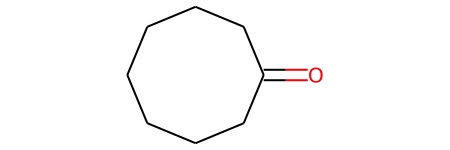

In [ ]:
Chem.MolFromSmiles(smiles[0])

In [ ]:
'''Sanity Check''' 
top_smiles[10] in ''.join([dataset.dict_inv[x] for x in target_seq_[10,:].numpy()])

True

In [ ]:
top_smiles[10] in ''.join([dataset.dict_inv[x] for x in input_seq[10,:].numpy()])

True

In [ ]:
len(top_smiles[8])

15

In [ ]:
torch.sum(mask[8,:])

tensor(16.)